<a href="https://colab.research.google.com/github/haneulllll/DataStudy/blob/main/%EB%B3%B5%EC%8A%B5_%EC%9D%B4%ED%95%9C%EC%9D%8486_0324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SimpleImputer**

: 평균, 중앙값, 최반값 등으로 결측값을 대체

**KNNImputer**

: k-최근접 이웃 알고리즘을 사용하여 결측값을 대체

**IterativeImputer**

: 베이지안 회귀를 사용하여 결측값을 대체

In [ ]:
pip install fancyimpute  # fancyimpute 모듈 설치

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=52dd3658f7eee08bc8df01fc6dacaef3609c7076a58df88363938359d1568f08
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=6a34e680e477b187b3457c4f0506e5472b2a675a1a24ba1b78ae7460c3f736fc
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
import numpy as np  # 수치계산 라이브러리
import pandas as pd  # 숫자/시계열 데이터 조작/분석하는 라이브러리
import matplotlib.pyplot as plt  # 시각화하기 위한 라이브러리
import seaborn as sns  # 통계데이터 시각화 라이브러리
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

In [ ]:
# 예시 데이터 만들기

np.random.seed(0) # 시드 : 항상 동일한 초기값을 얻고자 할 때 주로 사용 -> 항상 난수 초기값 0으로 생성한다.
data = np.random.normal(10,2,100)  # 평균 10, 표준편차 2인 데이터 100개를 생성하여 data에 저장
df = pd.DataFrame(data, columns=['Feature'])  # Feature 열에 data 를 담은 테이블 df 생성

# 결측치 만들기

df.loc[5:10, 'Feature'] = np.nan
df.loc[30:35, 'Feature'] = np.nan
df.loc[50: 60, 'Feature'] = np.nan

In [ ]:
# 결측치 제대로 생성되었는지 테이블 확인

df[0:10]

,Feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


**원본 데이터 시각화**

lineplot() : seaborn 라이브러리의 선그래프를 그리는 함수

<marker로 표시 가능한 모양>
* 's' : 사각형
* 'o' : 원
* 'D' :마름모
* '*' : 별



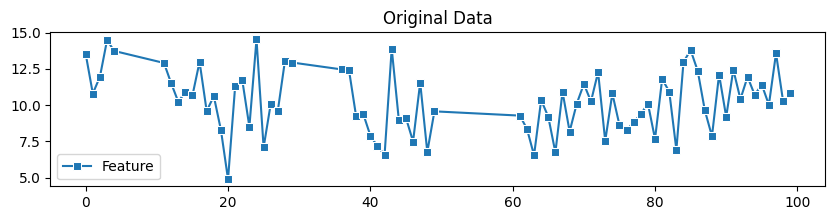

In [ ]:
plt.figure(figsize=(10,2))  # 가로10,세로2인치 크기의 그래프 생성
sns.lineplot(data=df, marker='s')  # df 데이터를 선으로 시각화/각 정점들을 사각형으로 표시
plt.title('Original Data')  # 그래프 제목 설정
plt.show()  # 그래프 보이기

**결측치 대체하는 다양한 방법**

In [ ]:
# 1. 1차 선형보간법, interpolate
df_linear = df.interpolate(mothod = 'linear')

# 1. 2차 선형보간법, interpolate
df_quadratic = df.interpolate(mothod = 'quadratic')

# 3. 평균대치법
imputer_mean = SimpleImputer(strategy='mean')
df_mean = imputer_mean.fit_transform(df)
df_mean = pd.DataFrame(df_mean, columns = ['Feature'])  # 새로운 dataframe 생성

# 4. 0으로 대체
df_zero = df.fillna(0)

# 5. KNN(이웃하는 값들을 사용하여 대체하는 알고리즘)
imputer_knn = KNNImputer(n_neighbors = 3)  # 결측값 주변 3개의 값들을 이용하여 대체하는 객체(Imputer) 생성
df_knn = imputer_knn.fit_transform(df)  # df의 결측값을 Imputer로 대체한 후 df_knn에 저장
df_knn = pd.DataFrame(df_knn, columns = ['Feature'])  # 새로운 dataframe 생성

# 6. MICE 다중대치법 (베이지안 회귀로 결측치를 대체)
mice_imputer = IterativeImputer()
df_mice = mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns = ['Feature'])

In [ ]:
df_linear[0:10]

,Feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
5,13.617035
6,13.498953
7,13.380872
8,13.262791
9,13.144710


In [ ]:
df_quadratic[0:10]

,Feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
5,13.617035
6,13.498953
7,13.380872
8,13.262791
9,13.144710


In [ ]:
df_mean[0:10]

,Feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
5,10.294425
6,10.294425
7,10.294425
8,10.294425
9,10.294425


In [ ]:
df_zero[0:10]

,Feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [ ]:
df_knn[0:10]

,Feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
5,10.294425
6,10.294425
7,10.294425
8,10.294425
9,10.294425


In [ ]:
df_mice[0:10]

,Feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
5,10.294425
6,10.294425
7,10.294425
8,10.294425
9,10.294425


In [ ]:
pd.concat([df_linear, df_quadratic, df_mean, df_zero, df_knn, df_mice], axis =1)

,Feature,Feature,Feature,Feature,Feature,Feature
0,13.528105,13.528105,13.528105,13.528105,13.528105,13.528105
1,10.800314,10.800314,10.800314,10.800314,10.800314,10.800314
2,11.957476,11.957476,11.957476,11.957476,11.957476,11.957476
3,14.481786,14.481786,14.481786,14.481786,14.481786,14.481786
4,13.735116,13.735116,13.735116,13.735116,13.735116,13.735116
...,...,...,...,...,...,...
95,11.413146,11.413146,11.413146,11.413146,11.413146,11.413146
96,10.021000,10.021000,10.021000,10.021000,10.021000,10.021000
97,13.571741,13.571741,13.571741,13.571741,13.571741,13.571741
98,10.253824,10.253824,10.253824,10.253824,10.253824,10.253824


**결측치 대체한 데이터 시각화**

lineplot() : seaborn 라이브러리의 선그래프를 그리는 함수

<marker로 표시 가능한 모양>
* 's' : 사각형
* 'o' : 원
* 'D' :마름모
* '*' : 별

lineplot(data = __ , marker = __ , ax= __ , legend = __)
* legend : 그래프의 범례설정


Text(0.5, 1.0, 'df_mice')

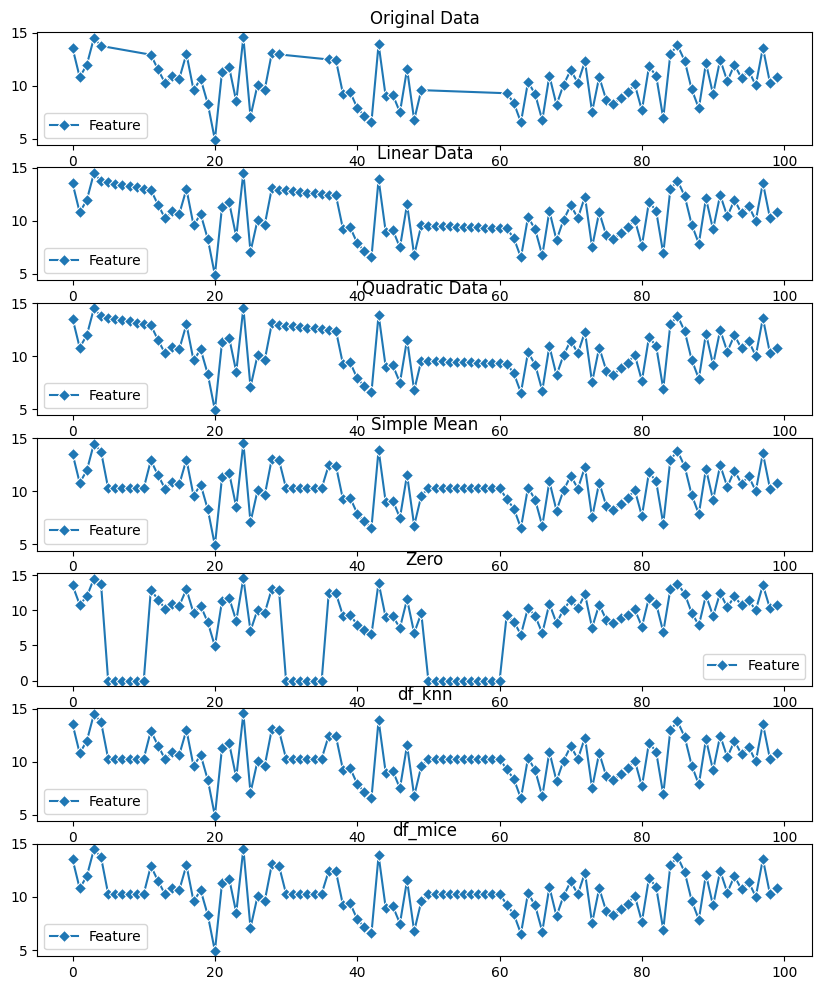

In [ ]:
fig, axs = plt.subplots(7,1,figsize=(10,12))
# 여러개의 그래프(7행 1열)를 포함하는 subplot을 생성/ 크기는 가로 10,세로12로 설정
# 생성된 figure 객체는 fig에 저장
# 생성된 subplot들은 axs에 저장
sns.lineplot(data= df, marker='D', ax=axs[0], legend='auto')
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear , marker='D', ax=axs[1], legend='auto')
axs[1].set_title('Linear Data')
sns.lineplot(data=df_quadratic , marker='D', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic Data')
sns.lineplot(data=df_mean , marker='D', ax=axs[3], legend='auto')
axs[3].set_title('Simple Mean')
sns.lineplot(data=df_zero , marker='D', ax=axs[4], legend='auto')
axs[4].set_title('Zero')
sns.lineplot(data=df_knn , marker='D', ax=axs[5], legend='auto')
axs[5].set_title('df_knn')
sns.lineplot(data=df_mice , marker='D', ax=axs[6], legend='auto')
axs[6].set_title('df_mice')